In [336]:
import magpylib as magpy
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.transform import Rotation as R

In [337]:

 len(angles)
 

2

In [338]:
import numpy as np
import magpylib as magpy

N = 10
angles = np.linspace(0, 360, N, endpoint=False)

halbach = magpy.Collection()

for a in angles:
    cube = magpy.magnet.Cuboid(
        dimension=(128,6,6),
        polarization=(1,0,0),
        position=(0,20,0)
    )
    cube.rotate_from_angax(a, 'x', anchor=0)
    cube.rotate_from_angax(a, 'x')
    halbach.add(cube)

halbach.show(backend='plotly')







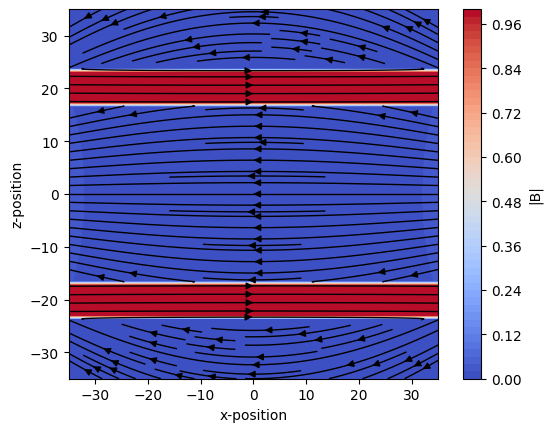

In [339]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Compute and plot field on x-y grid
grid = np.mgrid[-35:35:100j, -35:35:100j, 0:0:1j].T[0]
X, Y, _ = np.moveaxis(grid, 2, 0)

B = halbach.getB(grid)
Bx, By, _ = np.moveaxis(B, 2, 0)
Bamp = np.linalg.norm(B, axis=2)

pc = ax.contourf(X, Y, Bamp, levels=50, cmap="coolwarm")
ax.streamplot(X, Y, Bx, By, color="k", density=1.5, linewidth=1)

# Add colorbar
fig.colorbar(pc, ax=ax, label="|B|")

# Figure styling
ax.set(
    xlabel="x-position",
    ylabel="z-position",
    aspect=1,
)

plt.show()



In [340]:
halbach.getB([0,0,10])

array([-0.01183528,  0.        ,  0.        ])

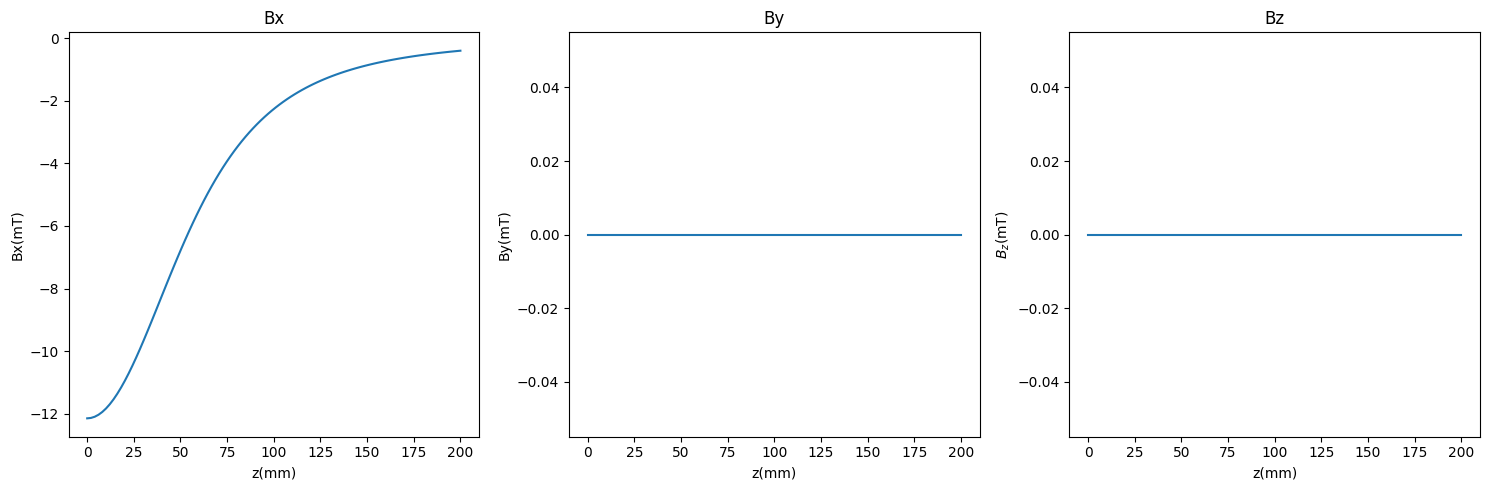

In [341]:
x = np.linspace(0,200,100)
hal_fieldx = []
hal_fieldy = []
hal_fieldz = []
x_p = []
for i in x:
    h = halbach.getB([0,0,i])
    #if h[0]  > 0:
    x_p.append(i)
    hal_fieldx.append(h[0])
    hal_fieldy.append(h[1])
    hal_fieldz.append(h[2])
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(x_p,np.array(hal_fieldx)*1e3)
ax[0].set_title('Bx')
ax[0].set_xlabel('z(mm)')
ax[0].set_ylabel('Bx(mT)')
ax[1].plot(x_p,np.array(hal_fieldy)*1e3)
ax[1].set_title('By')
ax[1].set_xlabel('z(mm)')
ax[1].set_ylabel('By(mT)')
ax[2].plot(x_p,np.array(hal_fieldz)*1e3)
ax[2].set_title('Bz')
ax[2].set_xlabel('z(mm)')
ax[2].set_ylabel('$B_z$(mT)')
plt.tight_layout()
plt.show()

In [362]:

zeeman_prof = magpy.Collection()
n =3
k= 45
angles = np.linspace(0, 360, n, endpoint=False)
for a in angles:
        cube1= magpy.magnet.Cuboid(
        dimension=(6,6,128),
        polarization=(0,-1.08,0),
        position=(100,A,0))
        cube2 = magpy.magnet.Cuboid(dimension= (4,4,25),
                        polarization=(0,-1.17,0),
                        position=(100,-17+A,-53))
        cube3= magpy.magnet.Cuboid(
        dimension=(6,6,128),
        polarization=(0,1.08,0),
        position=(100,60,150))
        cube4 = magpy.magnet.Cuboid(dimension= (4,4,25),
                        polarization=(0,1.08,0),
                        position=(100,0,110))
        cube5 = magpy.magnet.Cuboid(dimension= (4,4,25),
                        polarization=(0,1.08,0),
                        position=(100,-20,220))

        cube6 = magpy.magnet.Cuboid(dimension= (4,4,25),
                        polarization=(0,1.17,0),
                        position=(100,-12,205))

        cube1.rotate_from_angax(80.4, 'x', anchor=0)
        cube2.rotate_from_angax(90, 'x', anchor=0)
        cube3.rotate_from_angax(114, 'x', anchor=0)
        cube4.rotate_from_angax(90, 'x', anchor=0)
        cube5.rotate_from_angax(90, 'x', anchor=0)
        cube6.rotate_from_angax(90, 'x', anchor=0)
     

        cube1.rotate_from_angax(a, 'y', anchor=0)
        cube1.rotate_from_angax(a, 'y')
        cube2.rotate_from_angax(a, 'y', anchor=0)
        cube2.rotate_from_angax(a, 'y')
        cube3.rotate_from_angax(a, 'y', anchor=0)
        cube3.rotate_from_angax(a, 'y')
        cube4.rotate_from_angax(a, 'y', anchor=0)
        cube4.rotate_from_angax(a, 'y')
        cube5.rotate_from_angax(a, 'y', anchor=0)
        cube5.rotate_from_angax(a, 'y')
        cube6.rotate_from_angax(a, 'y', anchor=0)
        cube6.rotate_from_angax(a, 'y')


        zeeman_prof.add(cube1)
        zeeman_prof.add(cube2)
        zeeman_prof.add(cube3)
        zeeman_prof.add(cube4)
        zeeman_prof.add(cube5)
        zeeman_prof.add(cube6)

magpy.show(zeeman_prof)

In [360]:
zeeman_prof = magpy.Collection()
cube1= magpy.magnet.Cuboid(
dimension=(6,6,128),
polarization=(0,-1.08,0),
position=(100,0,0))
A = 30
k = 180
cube1= magpy.magnet.Cuboid(
        dimension=(6,6,128),
        polarization=(0,-1.08,0),
        position=(100,0,0))
cube2 = magpy.magnet.Cuboid(dimension= (4,4,25),
                polarization=(0,-1.17,0),
                position=(100,-17,-53))
cube3= magpy.magnet.Cuboid(
dimension=(6,6,128),
polarization=(0,1.08,0),
position=(100,60,150))
cube4 = magpy.magnet.Cuboid(dimension= (4,4,25),
                polarization=(0,1.08,0),
                position=(100,0,110))
cube5 = magpy.magnet.Cuboid(dimension= (4,4,25),
                polarization=(0,1.08,0),
                position=(100,-20 ,220))

cube6 = magpy.magnet.Cuboid(dimension= (4,4,25),
                polarization=(0,1.17,0),
                position=(100,-12,205))

cube1.rotate_from_angax(80.4, 'x', anchor=0)
cube2.rotate_from_angax(90, 'x', anchor=0)
cube3.rotate_from_angax(114, 'x', anchor=0)
cube4.rotate_from_angax(90, 'x', anchor=0)
cube5.rotate_from_angax(90, 'x', anchor=0)
cube6.rotate_from_angax(90, 'x', anchor=0)

cube1.rotate_from_angax(k, 'y', anchor=0)
cube1.rotate_from_angax(k, 'y')
cube2.rotate_from_angax(k, 'y', anchor=0)
cube2.rotate_from_angax(k, 'y')
cube3.rotate_from_angax(k, 'y', anchor=0)
cube3.rotate_from_angax(k, 'y')
cube4.rotate_from_angax(k, 'y', anchor=0)
cube4.rotate_from_angax(k, 'y')
cube5.rotate_from_angax(k, 'y', anchor=0)
cube5.rotate_from_angax(k, 'y')
cube6.rotate_from_angax(k, 'y', anchor=0)
cube6.rotate_from_angax(k, 'y')

zeeman_prof.add(cube1)
zeeman_prof.add(cube2)
zeeman_prof.add(cube3)
zeeman_prof.add(cube4)
zeeman_prof.add(cube5)
zeeman_prof.add(cube6)

magpy.show(zeeman_prof)


In [359]:
k = 45
A = 0
cube1= magpy.magnet.Cuboid(
        dimension=(6,6,128),
        polarization=(0,-1.08,0),
        position=(100,0,A))
cube2 = magpy.magnet.Cuboid(dimension= (4,4,25),
                polarization=(0,-1.17,0),
                position=(100,-17,-53+A))
cube3= magpy.magnet.Cuboid(
dimension=(6,6,128),
polarization=(0,1.08,0),
position=(100,60,150+A))
cube4 = magpy.magnet.Cuboid(dimension= (4,4,25),
                polarization=(0,1.08,0),
                position=(100,0,110+A))
cube5 = magpy.magnet.Cuboid(dimension= (4,4,25),
                polarization=(0,1.08,0),
                position=(100,-20 ,220+A))

cube6 = magpy.magnet.Cuboid(dimension= (4,4,25),
                polarization=(0,1.17,0),
                position=(100,-12,205+A))

cube1.rotate_from_angax(80.4, 'x', anchor=0)
cube2.rotate_from_angax(90, 'x', anchor=0)
cube3.rotate_from_angax(114, 'x', anchor=0)
cube4.rotate_from_angax(90, 'x', anchor=0)
cube5.rotate_from_angax(90, 'x', anchor=0)
cube6.rotate_from_angax(90, 'x', anchor=0)



zeeman_prof.add(cube1)
zeeman_prof.add(cube2)
zeeman_prof.add(cube3)
zeeman_prof.add(cube4)
zeeman_prof.add(cube5)
zeeman_prof.add(cube6)

magpy.show(zeeman_prof)

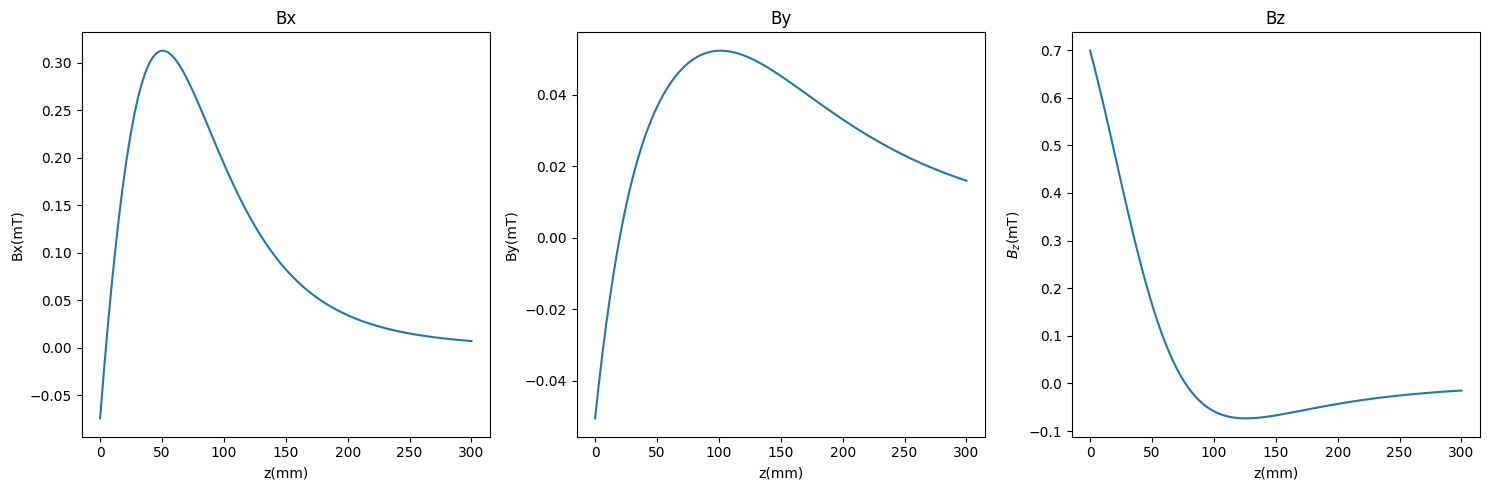

In [345]:

x = np.linspace(0,300,100)
zee_fieldx = []
zee_fieldy = []
zee_fieldz = []
x_p = []
for i in x:
    h = zeeman_prof.getB([0,0,i])
    #if h[0]  > 0:
    x_p.append(i)
    zee_fieldx.append(h[0])
    zee_fieldy.append(h[1])
    zee_fieldz.append(h[2])
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(x_p,np.array(zee_fieldx)*1e3)
ax[0].set_title('Bx')
ax[0].set_xlabel('z(mm)')
ax[0].set_ylabel('Bx(mT)')
ax[1].plot(x_p,np.array(zee_fieldy)*1e3)
ax[1].set_title('By')
ax[1].set_xlabel('z(mm)')
ax[1].set_ylabel('By(mT)')
ax[2].plot(x_p,np.array(zee_fieldz)*1e3)
ax[2].set_title('Bz')
ax[2].set_xlabel('z(mm)')
ax[2].set_ylabel('$B_z$(mT)')
plt.tight_layout()
plt.show()

In [346]:
magpy.show(zeeman_prof,zeeman_prof.rotate_from_angax(k, 'y'))